<a href="https://colab.research.google.com/github/prakruti-sid/Predicting-US-Housing-Trends-using-ML/blob/main/Predicting_House_Prices_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Libraries

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns

## Building the Dataset 🖥

### Federal Data 



1.   US 30 Year Mortgage Interest Rate - Weekly
2.   CPI - Inflation Metric  - Monthly
3.   Rental Vacancy Rate - Quarterly 


In [ ]:
#Source : https://fred.stlouisfed.org/series/CPIAUCSL
us30_link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTCqt7hdJEGCN8X0jKG9dsBqM1t9-CGgTETD89gL3AfQRhHCel6Yf4g9uX61zTCHy5ch9jnkrEbHdWZ/pub?output=csv'
cpi_link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT6EZDx7dyGMpA6mFxJVC_fQ4QtYtnMH78Ce_t94bajfLaCfpJINzFSSbx44pBiSpOvP6xrppufFG3M/pub?output=csv'
rentdata_link = '/content/drive/MyDrive/Dojo Bootcamp/Projects/Project 2/Data Files/RRVRUSQ156N.csv'


In [ ]:
fed_files = [us30_link, cpi_link,rentdata_link]
fed = [pd.read_csv(f, parse_dates= True, index_col=0) for f in fed_files]

In [ ]:
# 30 Year Mortgage Interest Rate [Weekly]
fed[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-09-15,6.02
2022-09-22,6.29
2022-09-29,6.70


In [ ]:
# Federal CPI - Inflation Data [Monthly]
fed[1]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-05-01,291.474
2022-06-01,295.328
2022-07-01,295.271


In [ ]:
# Rental Vacancy Data [Quaterly]
fed[2]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-04-01,6.2
2021-07-01,5.8
2021-10-01,5.6


In [ ]:
fed_data = pd.concat(fed, axis=1)

In [ ]:
fed_data

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
1947-01-01,NaN,21.48,NaN
1947-02-01,NaN,21.62,NaN
1947-03-01,NaN,22.00,NaN
1947-04-01,NaN,22.00,NaN
1947-05-01,NaN,21.95,NaN
...,...,...,...
2022-09-15,6.02,NaN,NaN
2022-09-22,6.29,NaN,NaN
2022-09-29,6.70,NaN,NaN


In [ ]:
fed_data.tail(50)

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
2021-12-30,3.11,NaN,NaN
2022-01-01,NaN,281.933,5.8
2022-01-06,3.22,NaN,NaN
2022-01-13,3.45,NaN,NaN
2022-01-20,3.56,NaN,NaN
2022-01-27,3.55,NaN,NaN
2022-02-01,NaN,284.182,NaN
2022-02-03,3.55,NaN,NaN
2022-02-10,3.69,NaN,NaN


Since the three datasets are in different time frames ... We will use `forward filling` to fill in the gaps

In [ ]:
fed_data = fed_data.ffill()

In [ ]:
fed_data.tail(50)

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
2021-12-30,3.11,280.126,5.6
2022-01-01,3.11,281.933,5.8
2022-01-06,3.22,281.933,5.8
2022-01-13,3.45,281.933,5.8
2022-01-20,3.56,281.933,5.8
2022-01-27,3.55,281.933,5.8
2022-02-01,3.55,284.182,5.8
2022-02-03,3.55,284.182,5.8
2022-02-10,3.69,284.182,5.8


### Zillow House Price Data

Source : https://www.zillow.com/research/data/



1.   Median Sale Price for US Homes

2.   Zillow Home Value Index



In [ ]:
zillow_files = ['/content/drive/MyDrive/Dojo Bootcamp/Projects/Project 2/Data Files/Metro_median_sale_price_uc_sfrcondo_week.csv','/content/drive/MyDrive/Dojo Bootcamp/Projects/Project 2/Data Files/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv']

In [ ]:
dfs = [pd.read_csv(f) for f in zillow_files]


In [ ]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-07-02,2022-07-09,2022-07-16,2022-07-23,2022-07-30,2022-08-06,2022-08-13,2022-08-20,2022-08-27,2022-09-03
0,102001,0,United States,country,NaN,183500.0,179900.0,180450.0,176000.0,182000.0,...,365000.0,360000.0,358000.0,353000.0,350000.0,349000.0,349900.0,350000.0,345000.0,348500.0
1,394913,1,"New York, NY",msa,NY,400000.0,410000.0,413870.0,410000.0,390000.0,...,580000.0,588500.0,599000.0,593450.0,580000.0,599000.0,587020.0,579250.0,580000.0,580000.0
2,753899,2,"Los Angeles, CA",msa,CA,475000.0,503500.0,520000.0,523250.0,489000.0,...,900000.0,900000.0,900000.0,875000.0,862500.0,880000.0,887500.0,890000.0,850000.0,855000.0
3,394463,3,"Chicago, IL",msa,IL,238000.0,236000.0,235000.0,245000.0,245000.0,...,320750.0,305000.0,315000.0,305000.0,310000.0,320000.0,310500.0,308500.0,294950.0,300000.0
4,394514,4,"Dallas, TX",msa,TX,133500.0,137500.0,130500.0,136000.0,139900.0,...,410000.0,415000.0,420000.0,405000.0,400000.0,400000.0,406200.0,400000.0,395000.0,400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,394685,277,"Homosassa Springs, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,273000.0,264000.0,280000.0,270000.0,290000.0,290000.0,275000.0,268500.0,257500.0,258250.0
142,394890,321,"Mount Vernon, WA",msa,WA,NaN,NaN,NaN,NaN,NaN,...,520000.0,525000.0,560000.0,490000.0,518500.0,507500.0,555000.0,500000.0,505000.0,522500.0
143,394474,329,"Cleveland, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,250000.0,240000.0,265000.0,255000.0,249950.0,284575.0,226000.0,315000.0,209000.0,270249.0
144,753912,373,"Pinehurst, NC",msa,NC,NaN,NaN,NaN,NaN,NaN,...,405000.0,387000.0,396500.0,389000.0,393000.0,407500.0,400000.0,402500.0,385000.0,435000.0


In [ ]:
# Isolate the US Country wide Data 
# which is the first Row

dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs]

In [ ]:
dfs[0]

,0
2008-02-02,183500.0
2008-02-09,179900.0
2008-02-16,180450.0
2008-02-23,176000.0
2008-03-01,182000.0
...,...
2022-08-06,349000.0
2022-08-13,349900.0
2022-08-20,350000.0
2022-08-27,345000.0


In [ ]:
dfs[1]

,0
1996-01-31,109323.629012
1996-02-29,109154.034652
1996-03-31,109213.959881
1996-04-30,109422.056145
1996-05-31,109671.155085
...,...
2022-05-31,356945.667516
2022-06-30,359718.57967
2022-07-31,359350.224752
2022-08-31,358215.302365


Again the Sales Price is in weekly timeframe and the House Price Index is Monthly. So lets fix that 

In [ ]:
# Creating a common 'Month' Column to merge the two dataframes
for df in dfs:
  df.index = pd.to_datetime(df.index)
  df['month'] = df.index.to_period('M')

In [ ]:
dfs[1]

,0,month
1996-01-31,109323.629012,1996-01
1996-02-29,109154.034652,1996-02
1996-03-31,109213.959881,1996-03
1996-04-30,109422.056145,1996-04
1996-05-31,109671.155085,1996-05
...,...,...
2022-05-31,356945.667516,2022-05
2022-06-30,359718.57967,2022-06
2022-07-31,359350.224752,2022-07
2022-08-31,358215.302365,2022-08


In [ ]:
price_data = dfs[0].merge(dfs[1], on='month')

In [ ]:
# Index of new df should be the same as the index of the first df
price_data.index = dfs[0].index 

In [ ]:
price_data

,0_x,month,0_y
2008-02-02,183500.0,2008-02,208185.281494
2008-02-09,179900.0,2008-02,208185.281494
2008-02-16,180450.0,2008-02,208185.281494
2008-02-23,176000.0,2008-02,208185.281494
2008-03-01,182000.0,2008-03,206749.991543
...,...,...,...
2022-08-06,349000.0,2022-08,358215.302365
2022-08-13,349900.0,2022-08,358215.302365
2022-08-20,350000.0,2022-08,358215.302365
2022-08-27,345000.0,2022-08,358215.302365


In [ ]:
price_data.drop(columns= 'month',inplace=True)

Cleaning up column names:

In [ ]:
price_data.columns = ['price', 'value']

In [ ]:
price_data

,price,value
2008-02-02,183500.0,208185.281494
2008-02-09,179900.0,208185.281494
2008-02-16,180450.0,208185.281494
2008-02-23,176000.0,208185.281494
2008-03-01,182000.0,206749.991543
...,...,...
2022-08-06,349000.0,358215.302365
2022-08-13,349900.0,358215.302365
2022-08-20,350000.0,358215.302365
2022-08-27,345000.0,358215.302365


### Merging the `Fed Data` df and the `Zillow Data` df

In [ ]:
fed_data = fed_data.dropna() # Drops rows where we don't have all three economic indicators

In [ ]:
fed_data

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
1971-04-02,7.33,40.100,5.3
1971-04-09,7.31,40.100,5.3
1971-04-16,7.31,40.100,5.3
1971-04-23,7.31,40.100,5.3
1971-04-30,7.29,40.100,5.3
...,...,...,...
2022-09-15,6.02,296.761,5.6
2022-09-22,6.29,296.761,5.6
2022-09-29,6.70,296.761,5.6


Align Fed Data with Zillow Data 

- The federal `Rental Vacancy` & the `Monthly CPI` come out on the 1st of every month
- The `Interest Rate` data comes out every Tuesday
- The `Zillow Data` comes out every Thursday. 
> We will focus on the weekly timeframe

In [ ]:
# Shifting all the fed data +2 days to align with zillow 
from datetime import timedelta

fed_data.index = fed_data.index + timedelta(days=2)

In [ ]:
fed_data

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N
DATE,,,
1971-04-04,7.33,40.100,5.3
1971-04-11,7.31,40.100,5.3
1971-04-18,7.31,40.100,5.3
1971-04-25,7.31,40.100,5.3
1971-05-02,7.29,40.100,5.3
...,...,...,...
2022-09-17,6.02,296.761,5.6
2022-09-24,6.29,296.761,5.6
2022-10-01,6.70,296.761,5.6


In [ ]:
price_data = fed_data.merge(price_data, left_index=True, right_index=True)

Our Combined DataFrame

In [ ]:
price_data

,MORTGAGE30US,CPIAUCSL,RRVRUSQ156N,price,value
2008-02-02,5.68,212.174,10.1,183500.0,208185.281494
2008-02-09,5.67,212.687,10.1,179900.0,208185.281494
2008-02-16,5.72,212.687,10.1,180450.0,208185.281494
2008-02-23,6.04,212.687,10.1,176000.0,208185.281494
2008-03-01,6.24,212.687,10.1,182000.0,206749.991543
...,...,...,...,...,...
2022-08-06,4.99,295.620,5.6,349000.0,358215.302365
2022-08-13,5.22,295.620,5.6,349900.0,358215.302365
2022-08-20,5.13,295.620,5.6,350000.0,358215.302365
2022-08-27,5.55,295.620,5.6,345000.0,358215.302365


Cleaning up column names 

In [ ]:
price_data.columns = ['interest', 'cpi', 'vacancy', 'price', 'value']

In [ ]:
price_data

,interest,cpi,vacancy,price,value
2008-02-02,5.68,212.174,10.1,183500.0,208185.281494
2008-02-09,5.67,212.687,10.1,179900.0,208185.281494
2008-02-16,5.72,212.687,10.1,180450.0,208185.281494
2008-02-23,6.04,212.687,10.1,176000.0,208185.281494
2008-03-01,6.24,212.687,10.1,182000.0,206749.991543
...,...,...,...,...,...
2022-08-06,4.99,295.620,5.6,349000.0,358215.302365
2022-08-13,5.22,295.620,5.6,349900.0,358215.302365
2022-08-20,5.13,295.620,5.6,350000.0,358215.302365
2022-08-27,5.55,295.620,5.6,345000.0,358215.302365


In [ ]:
# Copy the dataframe 
df = price_data.copy()

## Exploratory Data Analysis 📊

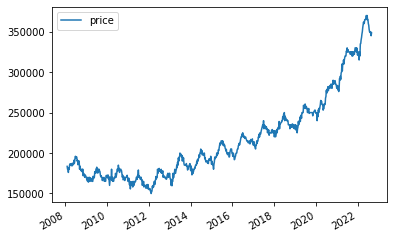

In [ ]:
df.plot.line(y='price',use_index=True)